`Chinmay G Khasanis`

`Simulation of random walk for absorbing and reflecting boundary conditions.` 

In [1]:
##### import required libraries #####
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

## Generate one random walk trajectory

In [15]:
## parameters of the system        

def parameters():
    probability=0.5       # probability of moving to the right
    spacing = 1           # length of one unit
    units = 100            # number of lattice points
    absorbing_bc = -units*spacing           # absorbing boundary
    reflecting_bc = units*spacing           # absorbing boundary
    return  probability, spacing, units, absorbing_bc, reflecting_bc

## function for 1D-Random walk

def random_walk_bc(p, steps, a, absorbing_bc, reflecting_bc): 
    X = np.zeros(steps)
    for j in range(1, steps):
        rand_num = np.random.rand()
        if rand_num < p:
            dx = -a
        else:
            dx = a
        X[j] = X[j-1] + dx
        if X[j]  == reflecting_bc+1:
            X[j] = X[j-1]
        if X[j]  == absorbing_bc:
            X = X[:j]
            break
    return X

### check simulation for 1 walker

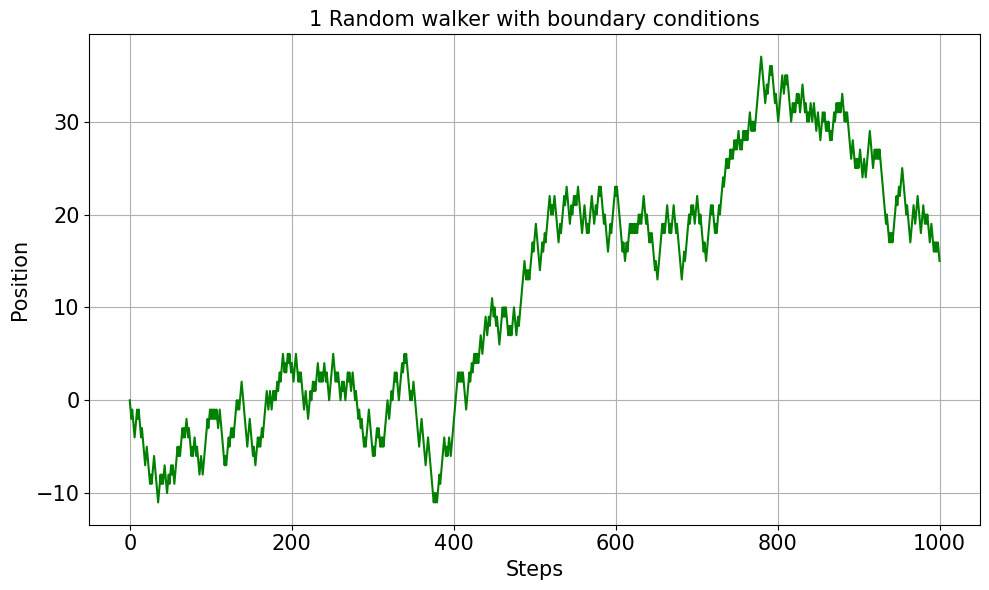

In [80]:
steps=1000 
probability, spacing, units, absorbing_bc, reflecting_bc = parameters()

X = random_walk_bc(p=probability, steps=steps, a=spacing,
                   absorbing_bc=absorbing_bc, reflecting_bc=reflecting_bc)

plt.figure(figsize=(10,6))
plt.plot(np.linspace(0, X.shape[0],X.shape[0]), X , color='g')
plt.xlabel('Steps',fontsize=15);plt.ylabel('Position',fontsize=15)
plt.title('1 Random walker with boundary conditions',fontsize=15)
plt.yticks(fontsize=15); plt.xticks(fontsize=15)
plt.tight_layout(); plt.grid(); plt.show()

### check simulation for many walkers

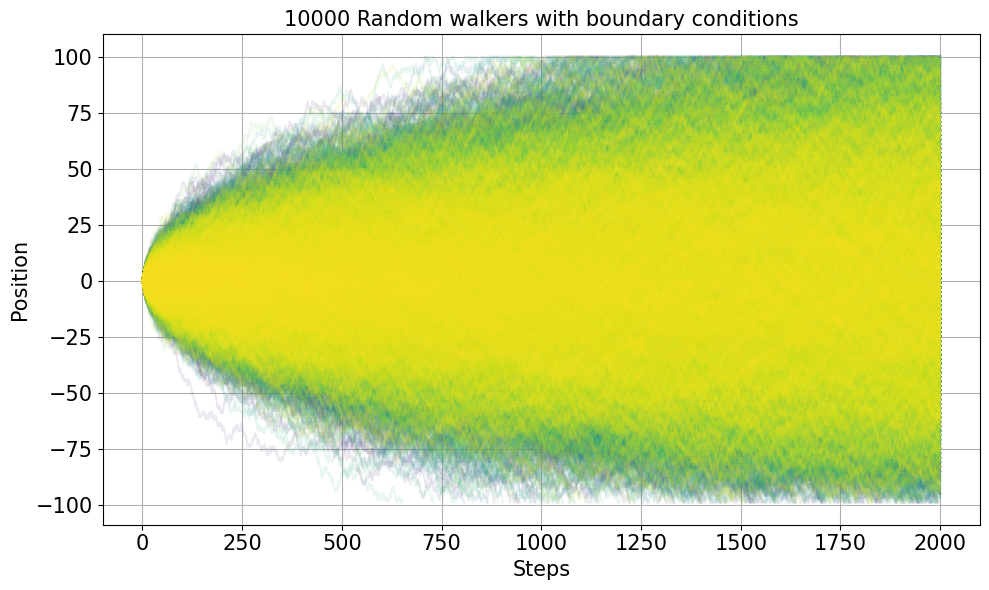

In [20]:
steps=2000  ; walkers=10000
probability, spacing, units, absorbing_bc, reflecting_bc = parameters()

plt.figure(figsize=(10,6))
cmp = colormaps['viridis'](np.linspace(0, 1, walkers))
for i in range (walkers):
    X = random_walk_bc(p=probability, steps=steps, a=spacing,
                       absorbing_bc=absorbing_bc, reflecting_bc=reflecting_bc)
    plt.plot(np.linspace(0, X.shape[0],X.shape[0]), X, color=cmp[i], alpha=0.1)
plt.xlabel('Steps',fontsize=15) ; plt.ylabel('Position',fontsize=15)
plt.title('%.5i Random walkers with boundary conditions' %walkers,fontsize=15)
plt.yticks(fontsize=15); plt.xticks(fontsize=15)
plt.tight_layout(); plt.grid(); plt.show()

## Simulate many walkers and get the survival probability

In [84]:
def many_walkers_simulate(steps_list,walkers):
    probability, spacing, units, absorbing_bc, reflecting_bc = parameters()
    setX_list =[] ; survival_list = []

    # iterate through list of steps
    for steps in steps_list:
        setX = []
        falls = 0           #initialise the fall count to zero
        for i in range(walkers):
            X = random_walk_bc(p=probability, steps=steps, a=spacing,
                            absorbing_bc=absorbing_bc, reflecting_bc=reflecting_bc)
            
        # survived walkers
            if len(X) == steps:
                setX.append(X[-1])
        # else number of steps simulated < given steps implies the walker fell down
            else:              
                falls = falls+1  # number of walkers falling down

        setX_list.append(setX)
        # survival probability = 1- falling probability
        survival_list.append(1-(falls/walkers)) 

    return setX_list, survival_list

#### function to plot histogramm
def get_histogram(s,setX_list,steps_list):
    # _,_,units,_,_= parameters()
    plt.figure(figsize=(10,5))
    bin= int(np.max(setX_list[s])-np.min(setX_list[s]))
    plt.hist(setX_list[s], bins=bin, density=True)
    plt.xlabel('X',fontsize=15) 
    plt.ylabel('P[X|steps=steps]',fontsize=15)
    plt.title('Histogram of 10000 walkers at %.2i steps' %steps_list[s],fontsize=15)
    plt.yticks(fontsize=15); plt.xticks(fontsize=15)
    plt.tight_layout(); plt.grid(); plt.show()

In [53]:
## Start the simultion
walkers=10000
steps_list = [50,100,500,1000,5000,10000] 
setX_list, survival_list = many_walkers_simulate(steps_list,walkers)

### Histograms for various steps

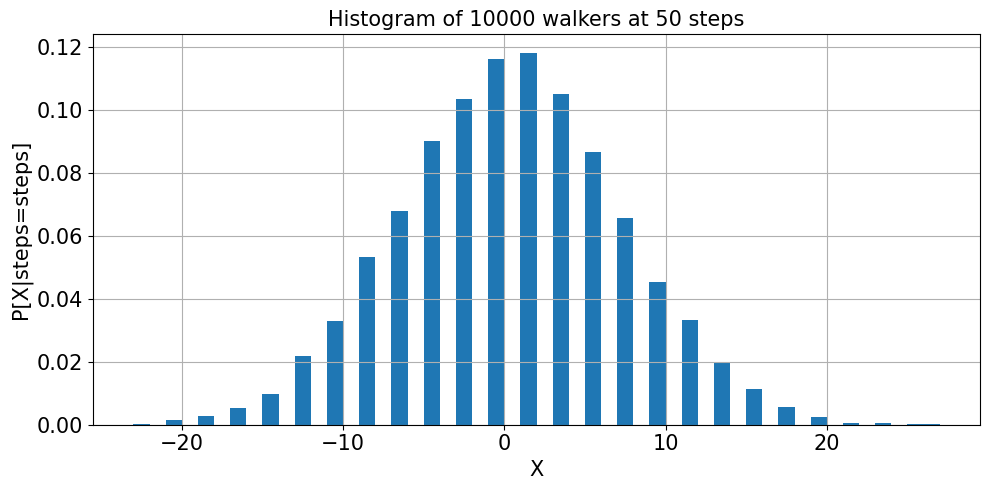

In [85]:
get_histogram(0,setX_list,steps_list)

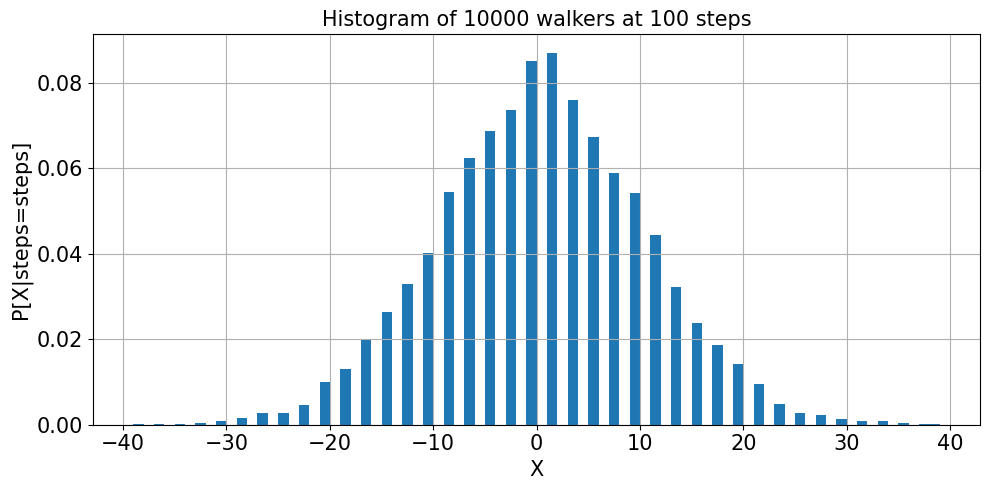

In [86]:
get_histogram(1,setX_list,steps_list)

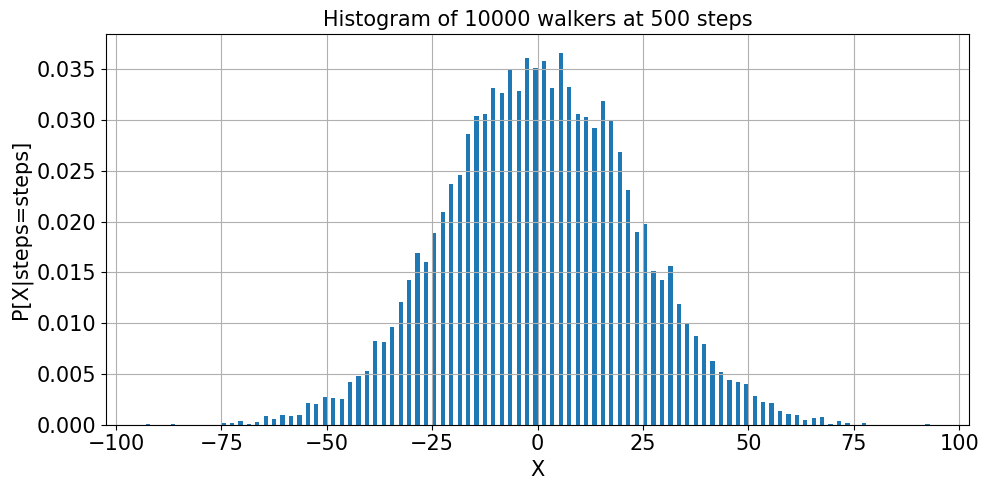

In [87]:
get_histogram(2,setX_list,steps_list)

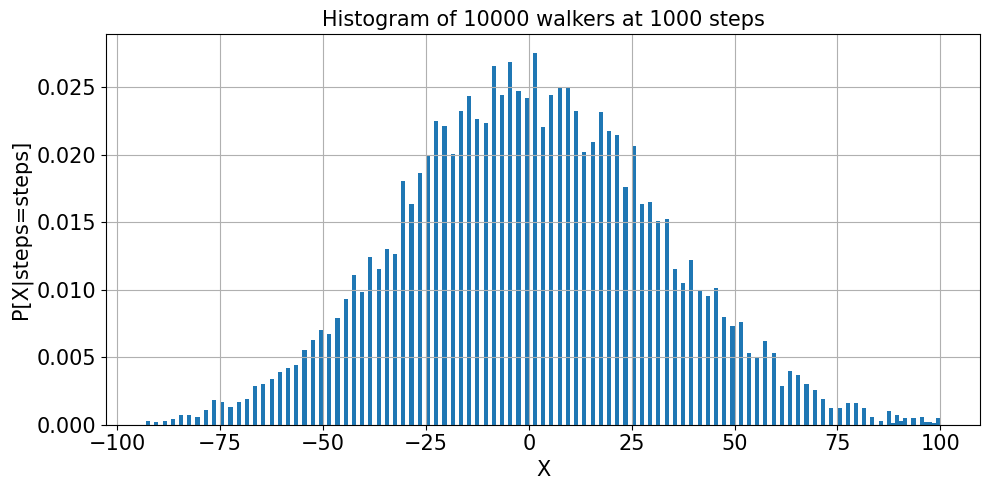

In [88]:
get_histogram(3,setX_list,steps_list)

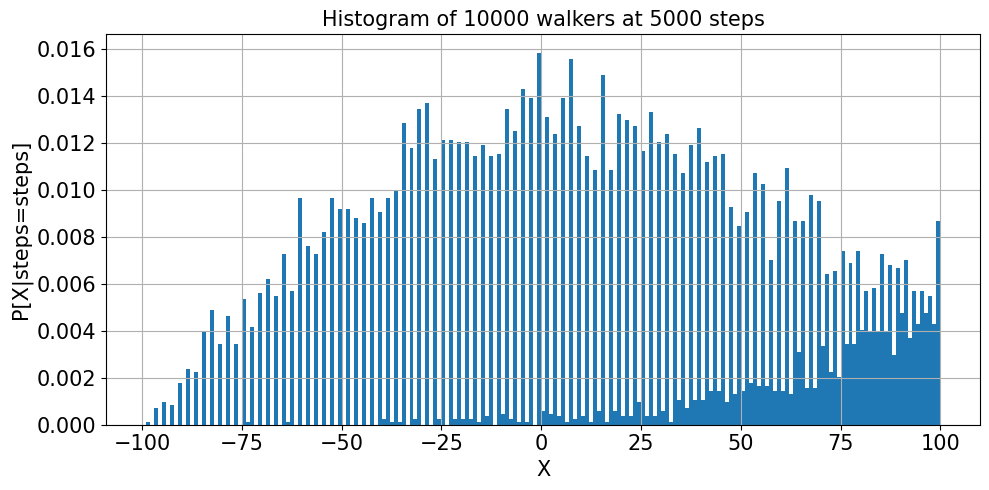

In [89]:
get_histogram(4,setX_list,steps_list)

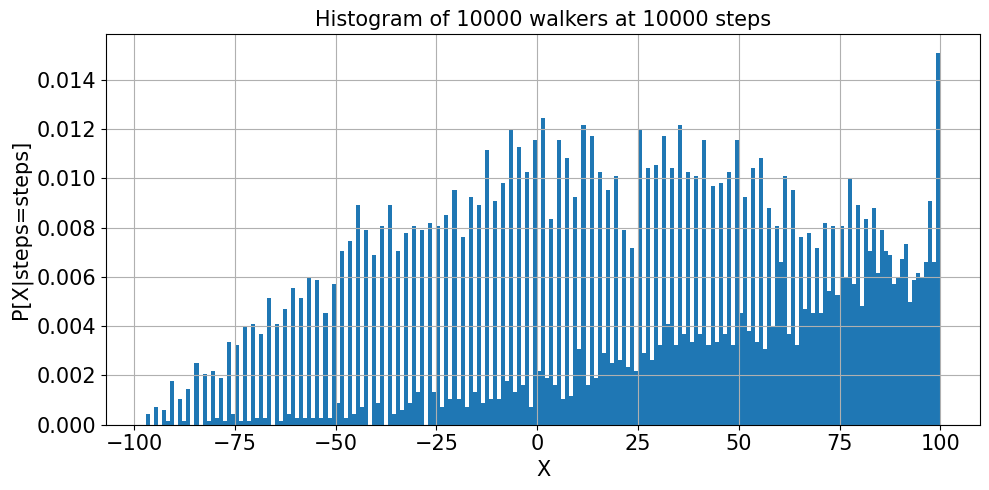

In [90]:
get_histogram(5,setX_list,steps_list)

### Survival probability plot for various steps

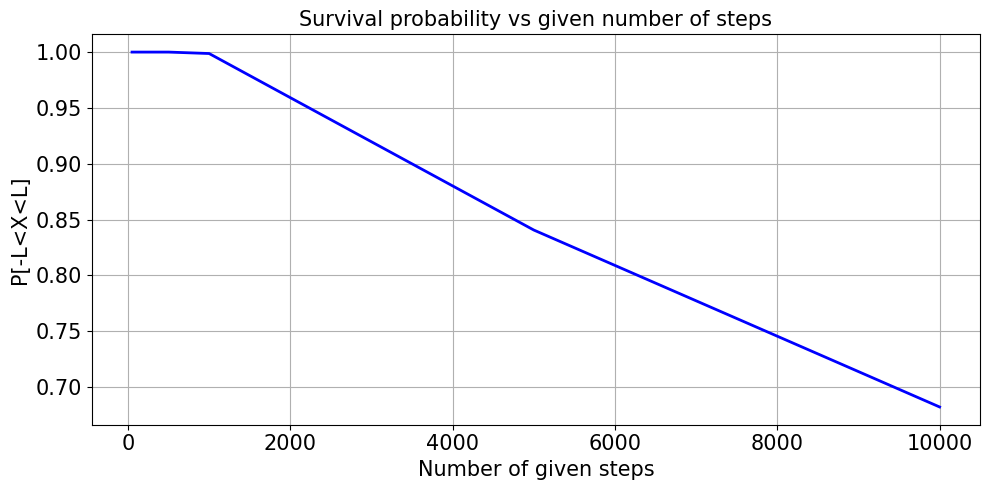

In [91]:
plt.figure(figsize=(10,5))
plt.plot(steps_list, survival_list, linewidth=2, color = 'b')
plt.xlabel('Number of given steps',fontsize=15 ) 
plt.ylabel('P[-L<X<L]',fontsize=15)
plt.title('Survival probability vs given number of steps', fontsize=15)
plt.yticks(fontsize=15); plt.xticks(fontsize=15)
plt.tight_layout(); plt.grid(); plt.show()